# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

The goal is to create a Convolutional Neural Network (CNN) model capable of accurately classifying images of plant seedlings into 12 distinct species, as provided by the Aarhus University Signal Processing group and the University of Southern Denmark. This technological solution aims to automate plant recognition, allowing agricultural workers to concentrate on more complex decision-making and strategic tasks. By streamlining plant identification, the model is expected to enhance crop yields and promote more sustainable agricultural practices.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user
# !pip install tensorflow==2.15.0  numpy==1.24.3 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

In [3]:
#!pip install --no-index -f https://github.com/dreoporto/ptmlib/releases ptmlib

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np # Fundamental package for scientific computing in Python.
import pandas as pd # Open source library providing easy to use  and high-performance data structures and data analysis tools.
import plotly.express as px
import os
# import libraries for data visualization
import matplotlib.pyplot as plt # Used for creating interactive visualizations.
import seaborn as sns  # Data visualization library based on matplotlib to provide a high-level interface for drawing informative graphics.
%matplotlib inline

sns.set_theme()
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [5]:
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization,Conv2D, MaxPooling2D, LeakyReLU, Activation #importing different layers and Batch normalizers
from tensorflow.keras import backend
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import random
# import ydata_profiling as ydp
import ptmlib.model_tools as modt
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# from google.colab.patches import cv2_imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [6]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# read the data and load it
labels = pd.read_csv("Labels.csv") # Load the labels
images = np.load('images.npy') # Load the images

## Data Overview

### Understand the shape of the dataset

In [8]:
# Verifying the shape of the given datasets
print("labels: ", labels.shape)
print("images: ", images.shape)

labels:  (4750, 1)
images:  (4750, 128, 128, 3)


#### Observations
* There are 4750 Labels 
* There are 4750 (128 x 128) 3 layer images in the given data set.

In [9]:
# Function to plot the images
def plot_images(images, labels):
    num_classes = 10  # Number of Classes
    categories = np.unique(labels)
    keys = dict(labels['Label'])  # Obtaing the unique classes from y_train
    rows = 3  # Defining number of rows=3
    cols = 4  # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))  # Defining the figure size to 10x8
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(
                0, len(labels)
            )  # Generating random indices from the data and plotting the images
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)  # Adding subplots with 3 rows and 4 columns
            ax.imshow(images[random_index, :])  # Plotting the image
            ax.set_title(keys[random_index])
    plt.show()

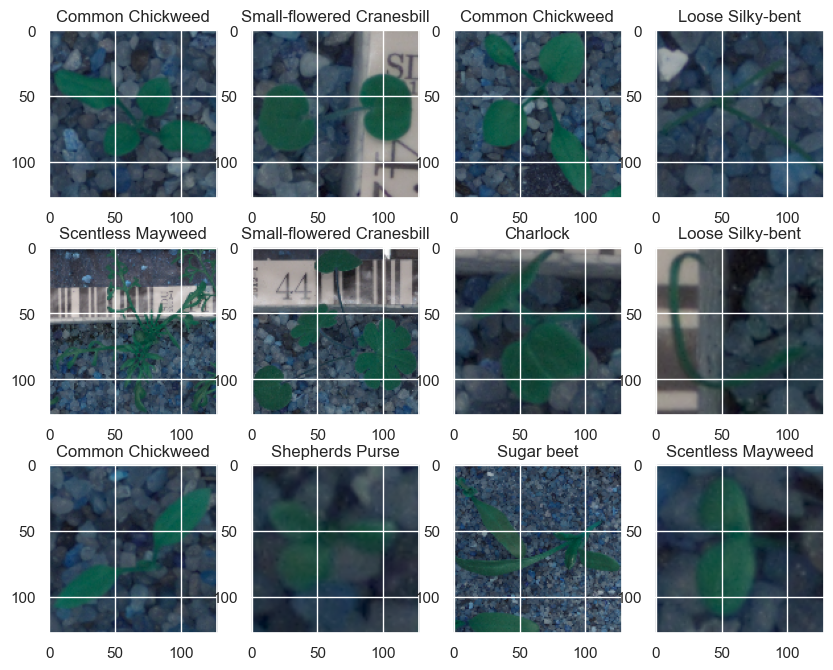

In [10]:
# Plot random sample images from the source
plot_images(images, labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

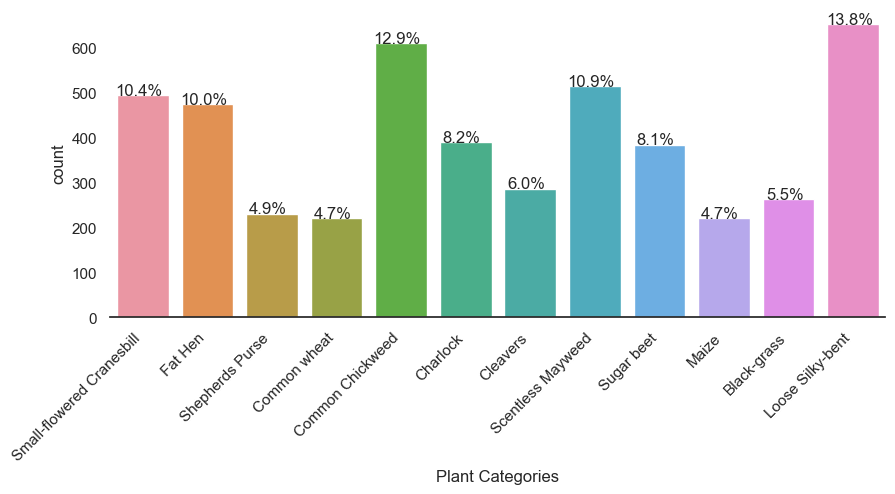

In [11]:
# Get the categorical distribution from data frame
data=labels.copy()
plt.figure(figsize=(10,4))
sns.set_theme(style="white")

sns.set_palette('twilight_shifted')
ax=sns.countplot(x=data['Label'], data=data )
order = data['Label'].value_counts(ascending=False).index

sns.despine(top=True,right=True,left=True)
for p in ax.patches:
   percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['Label']))
   x = p.get_x() + p.get_width() / 2 - 0.06
   y = p.get_y() + p.get_height()
   plt.annotate(percentage, (x, y),ha='center')
plt.xlabel('Plant Categories')
plt.xticks(rotation='vertical')
plt.xticks(rotation=45, ha='right')
#plt.title(categories[i].upper())

####  Observations
* There are total 4750 plant images under 12 plant categories in the given data set.
* Image is of size 128 X 128
* Images are having three channels representing RGB channels (Red, Blue, Green)
* "Loose Silky-bent" category is the most prominent plant samples (13.8%) compared to other categories.
* "Common Wheat" and "Maize" are the least counted (4.7%) samples categories.

## Data Pre-Processing

In [12]:
# Convert labels to numpy array
labels = labels['Label'].values

### Convert the BGR images to RGB images.

In [13]:
#The images available are images stored in an array 'bgr_images': We shall convert them to RGB
rgb_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
IMG_SIZE = 64
resized_images = np.array([resize(image, (IMG_SIZE, IMG_SIZE)) for image in images])

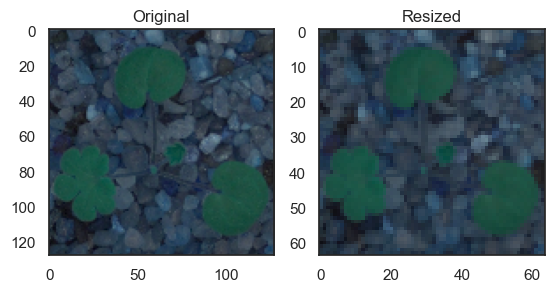

In [15]:
# "Plot the image to see the changes of the original and resized images"
count = 2
Titles = ["Original", "Resized"]
image = [images[50], resized_images[50]]
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.title(Titles[i])
    plt.imshow(image[i])

plt.show();

### Data Preparation for Modeling

- Before we proceed to build a model, we need to split the data into train and test dataset to be able to evaluate the model that you build on the train data
- We have to encode categorical features and scale the pixel values.
- We will build a model using the train data and then check its performance

**Split the dataset**

In [16]:
# Split full dataset into train and test set at 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

### Encode the target labels

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels for  training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now convert the integer-encoded labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=12)
y_test_onehot = to_categorical(y_test_encoded, num_classes=12)

In [18]:
y_train_encoded.shape, y_test_encoded.shape

((3800,), (950,))

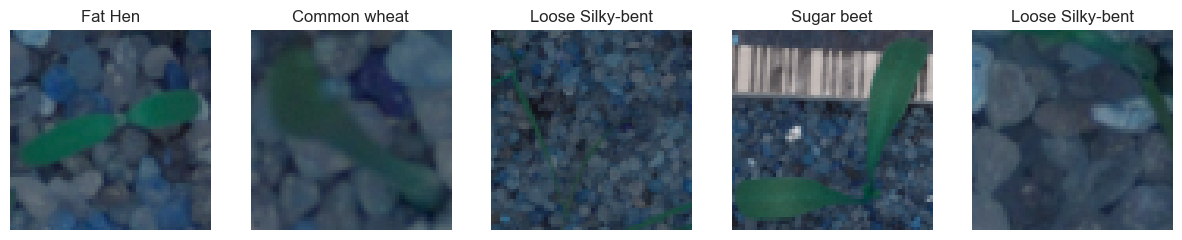

In [19]:
# Checking the shape 0f some random images and their labels from training dataset
num_images = 5
random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)

# Plotting the images with labels
plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices, start=1):
    ax = plt.subplot(1, num_images, i)
    plt.imshow(X_train[index])
    ax.title.set_text(y_train[index])
    plt.axis('off')
plt.show()

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3800, 64, 64, 3) (3800,)
(950, 64, 64, 3) (950,)


#### Observations

* The dataset includes a total of 4,750 images, which is split into a training set and a test set. 
* The training set has 3,800 images, while the test set contains 950 images. 
* Each image has the resized dimensions of 64 x 64 pixels and is in the RGB color space, meaning it has three channels for the Red, Green, and Blue components. 
* The labels are distributed similarly, with 3,800 labels for the training set and 950 labels for the test set, ensuring each image is paired with a label for classification purposes.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

##### How are these different category plant images different from each other?

In [21]:
# Convert the labels in y_train to a Pandas Series
y_train_series = pd.Series(y_train)

# Get the value counts of the target variable
count = y_train_series.value_counts()
print(count)
print('===' * 10)

# Normalize the Value counts
count_normalized = y_train_series.value_counts(normalize=True)
print(count_normalized)

Loose Silky-bent             513
Common Chickweed             509
Scentless Mayweed            411
Small-flowered Cranesbill    382
Fat Hen                      381
Charlock                     314
Sugar beet                   312
Cleavers                     225
Black-grass                  216
Common wheat                 183
Maize                        179
Shepherds Purse              175
dtype: int64
Loose Silky-bent             0.135000
Common Chickweed             0.133947
Scentless Mayweed            0.108158
Small-flowered Cranesbill    0.100526
Fat Hen                      0.100263
Charlock                     0.082632
Sugar beet                   0.082105
Cleavers                     0.059211
Black-grass                  0.056842
Common wheat                 0.048158
Maize                        0.047105
Shepherds Purse              0.046053
dtype: float64


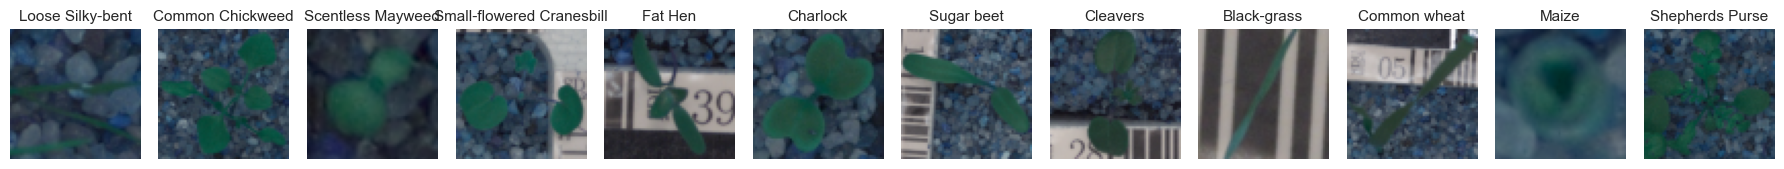

In [22]:
# Assuming 'X_train' and 'y_train' contains images and corresponding class labels respectively.
category_names = [
    "Loose Silky-bent",
    "Common Chickweed",
    "Scentless Mayweed",
    "Small-flowered Cranesbill",
    "Fat Hen",
    "Charlock",
    "Sugar beet",
    "Cleavers",
    "Black-grass",
    "Common wheat",
    "Maize",
    "Shepherds Purse"
]

# Create a figure with subplots - one row for each category
fig, axes = plt.subplots(1, len(category_names), figsize=(1.5 * len(category_names), 4))

if len(category_names) == 1:
    axes = [axes]  # Make the axes iterable for a single category

for i, label in enumerate(category_names):
    # Find the matching indices for the label
    indices = np.where(y_train == label)[0]
    if indices.size > 0:
        idx = np.random.choice(indices, 1)[0]  # Pick 1 index randomly
        axes[i].imshow(X_train[idx])
        axes[i].set_title(label, fontsize=11)
        axes[i].axis('off')
    else:
        axes[i].set_visible(False)  #If no image found for the category, then hide the axes

plt.tight_layout()
plt.show()

#### Is the dataset provided an imbalance? (Check with using bar plots)

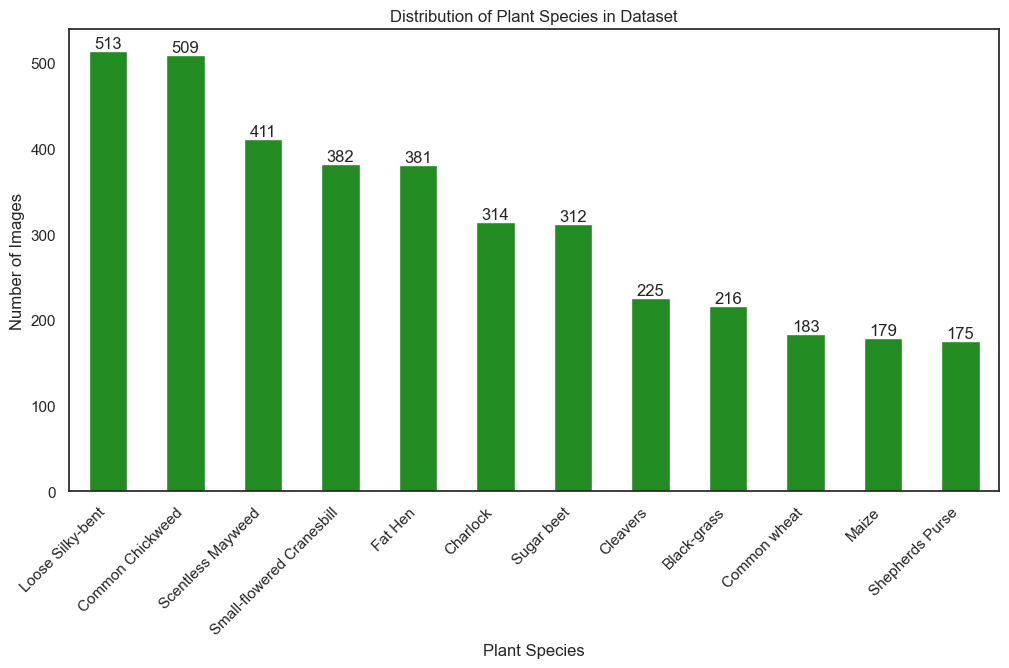

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the labels in y_train to a Pandas Series
y_train_series = pd.Series(y_train)

# Get the value counts of the target variable
actual_count = y_train_series.value_counts()

# Create the bar plot for actual counts
plt.figure(figsize=(12, 6))
ax = actual_count.plot(kind='bar', color='forestgreen')

# Add percentages on the bar plot
total = actual_count.sum()
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total) * 100
    
    # Add percentage text
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (top of the bar)
        f'{height}',  # Text value (count)
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.xlabel('Plant Species')
plt.ylabel('Number of Images')
plt.title('Distribution of Plant Species in Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


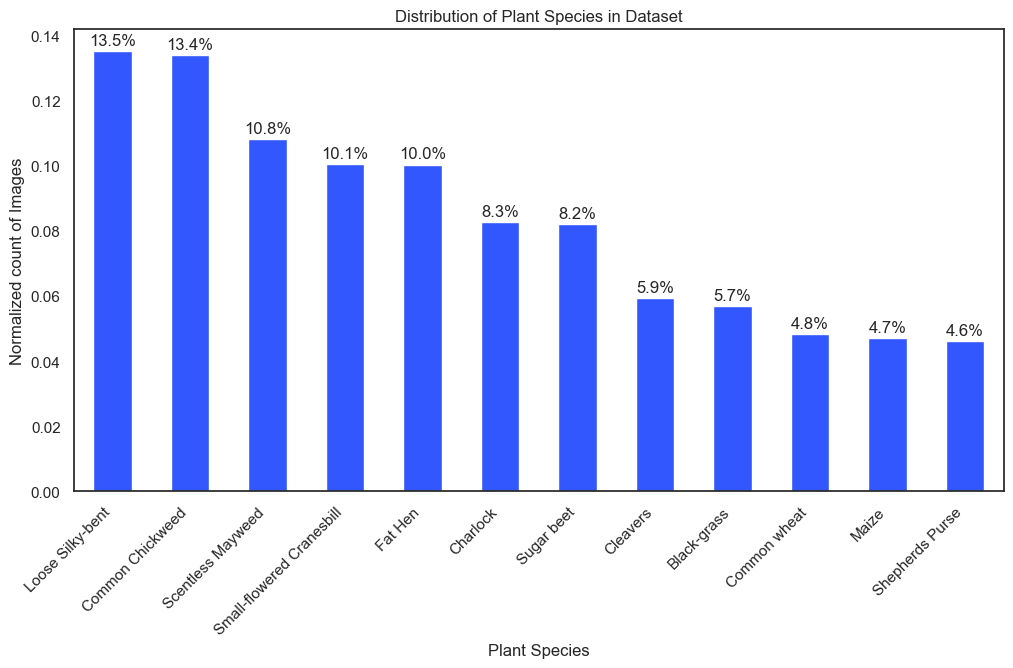

In [24]:
# Value counts in a normalized form
normalized_counts = y_train_series.value_counts(normalize=True)

# Create the bar plot for normalized counts
plt.figure(figsize=(12, 6))
ax = normalized_counts.plot(kind='bar', color='#3357FF')

# Add percentages on the bar plot
total = normalized_counts.sum()
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total) * 100
    
    # Add percentage text
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of the bar)
        height + 0.001,  # y position for percentage visibility
        f'{percentage:.1f}%',  # Text value (percentage)
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.xlabel('Plant Species')
plt.ylabel('Normalized count of Images')
plt.title('Distribution of Plant Species in Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Observations from EDA

* The bar plot details the distribution of plant species within the dataset, presenting both their counts and relative percentages. 
* The dataset includes 12 different plant species, with "Loose Silky-bent" being the most frequent at 513 occurrences, representing 13.5% of the dataset. It is closely followed by "Common Chickweed," which appears 509 times, making up 13.4% of the dataset.
* Other species with notable counts include "Scentless Mayweed," "Small-flowered Cranesbill," and "Fat Hen," with 411, 382, and 381 respectively, highlighting their substantial presence in the dataset.
* "Shepherd's Purse" is the rarest species, with only 175 occurrences, representing 4.6% of the dataset. Other species with lower counts are "Maize" and "Common Wheat," with 179 and 183 occurrences, respectively.

* The dataset features a wide range of species, from those that are highly common to those that are relatively rare, demonstrating its broad diversity. This variety suggests that the dataset is well-suited for developing robust machine learning models for plant species classification. The distribution percentages shed light on the dataset’s structure, helping to formulate targeted strategies for training models and addressing potential imbalances among species.

* It is clear from the bar plot that there is a certain level of imbalance. Species like "Loose Silky-bent" and "Common Chickweed" are highly prevalent, each with more than 500 images, whereas "Shepherd's Purse" and "Maize" are less frequent, each having less than 200 images. This imbalanced dataset can lead to a model that performs well on more frequent classes but poorly on those with fewer examples. This disparity arises because the model has more data to learn from for the more common species, potentially resulting in biased predictions and reduced accuracy for the less represented classes.

### Data Normalization

In [25]:
# Normalize the data to a range of 0-1
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

In [26]:
# Clearing Backend session
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [27]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Compile model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

As we can see from the above summary, this CNN model will train and learn 235,616 parameters (weights and biases).

Let's now compile and train the model using the train data. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

Early stopping is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.

Monitor: Quantity to be monitored.
Mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
Patience: Number of epochs with no improvement after which training will be stopped.
ModelCheckpoint callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model1.fit(X_train,
                    y_train_onehot,  # Make sure to use the one-hot encoded labels here
                    epochs=30,
                    batch_size=32,
                    validation_split=0.10,
                    callbacks=[es, mc])

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 2.3833 - accuracy: 0.1579
Epoch 1: val_accuracy improved from -inf to 0.24211, saving model to best_model.h5
107/107 [==============================] - 17s 140ms/step - loss: 2.3833 - accuracy: 0.1579 - val_loss: 2.2404 - val_accuracy: 0.2421
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 1.7747 - accuracy: 0.3965
Epoch 2: val_accuracy improved from 0.24211 to 0.45263, saving model to best_model.h5
107/107 [==============================] - 15s 136ms/step - loss: 1.7747 - accuracy: 0.3965 - val_loss: 1.6625 - val_accuracy: 0.4526
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 1.3830 - accuracy: 0.5094
Epoch 3: val_accuracy improved from 0.45263 to 0.55789, saving model to best_model.h5
107/107 [==============================] - 14s 135ms/step - loss: 1.3830 - accuracy: 0.5094 - val_loss: 1.3175 - val_accuracy: 0.5579
Epoch 4/30
107/107 [==============================] - E

#### Plotting Accuracy vs Epoch Curve

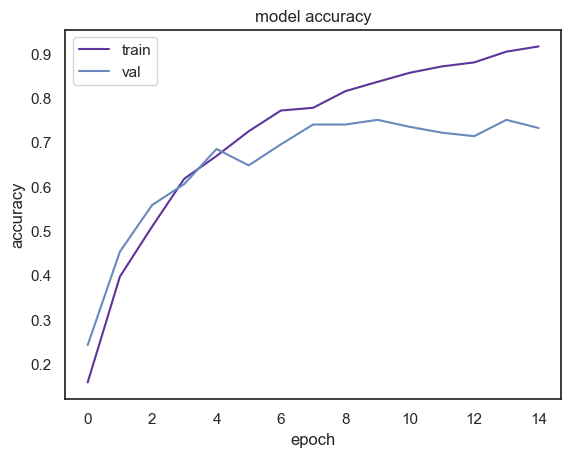

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* From the above plot, it seems that the model is overfitting, lets try to use Dropout in the next model.

In [30]:
model1.evaluate(X_test,(y_test_onehot))

30/30 [==============================] - 1s 35ms/step - loss: 0.9315 - accuracy: 0.7484


[0.931492269039154, 0.7484210729598999]

In [31]:
# Generate predictions for the test set
predictions = model1.predict(X_test)

30/30 [==============================] - 1s 38ms/step


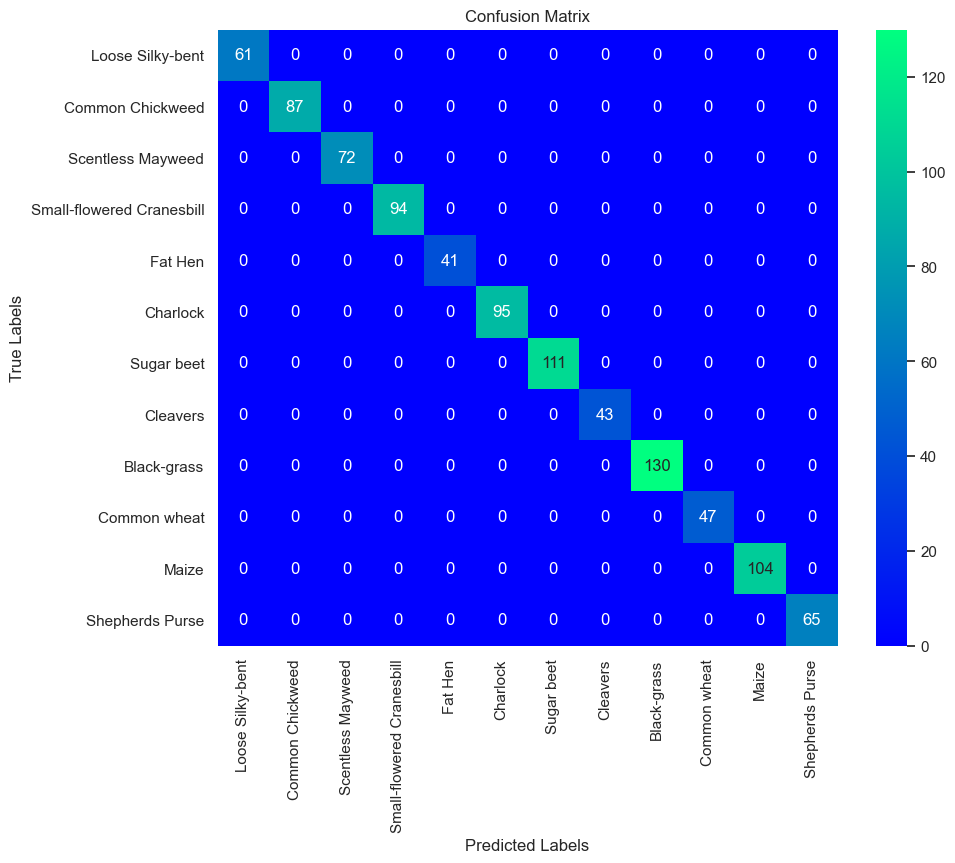

In [32]:
# Assuming 'predictions' and 'y_test_encoded' are model predictions and true labels, respectively
# Convert predictions from one-hot encoded to class indices if necessary
predicted_labels = predictions.argmax(axis=1)
true_labels = predictions.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter', xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
# Since our model is a Keras/TensorFlow model and your labels are one-hot encoded
predictions = model1.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

30/30 [==============================] - 1s 34ms/step


In [34]:
from sklearn.metrics import classification_report

# If y_test is one-hot encoded, convert it to class indices
true_labels = np.argmax(y_test_onehot, axis=1)

# Now print the classification report
print(classification_report(true_labels, predicted_labels, target_names=category_names))

                           precision    recall  f1-score   support

         Loose Silky-bent       0.31      0.40      0.35        47
         Common Chickweed       0.79      0.91      0.85        76
        Scentless Mayweed       0.78      0.90      0.84        62
Small-flowered Cranesbill       0.89      0.82      0.86       102
                  Fat Hen       0.49      0.53      0.51        38
                 Charlock       0.80      0.81      0.80        94
               Sugar beet       0.77      0.61      0.68       141
                 Cleavers       0.74      0.76      0.75        42
              Black-grass       0.67      0.83      0.74       105
             Common wheat       0.83      0.70      0.76        56
                    Maize       0.89      0.82      0.85       114
          Shepherds Purse       0.77      0.68      0.72        73

                 accuracy                           0.75       950
                macro avg       0.73      0.73      0.73    

In [35]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = hist.index + 1

fig = px.line(
    hist, x='epoch', y=['accuracy', 'val_accuracy', 'loss', 'val_loss'],
)
fig.update_layout(
    title="Train and Validation Losses Over Epochs",
    xaxis_title="Epochs",
    yaxis_title="Accuracy/Loss",
    legend_title="Metrics",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=500,
    yaxis=dict(dtick=0.2)
)
fig.add_shape(
    type="line",
    x0=0,
    x1=max(hist["epoch"]),
    y0=1,
    y1=1,
    line=dict(
        color="gray",
        width=2,
        dash="dot",  # Dotted line
    )
)
fig.show();



#### Observations

* Throughout the training of CNN model over 15 epochs, substantial progress was observed. Initially, the model had a training accuracy of 15.79% and a validation accuracy of 24.21%. The model improved rapidly, achieving its highest accuracy of 91.55% by the 15th epoch. However, while training accuracy continued to rise, reaching 91.55%, validation accuracy plateaued, indicating overfitting. An early stopping mechanism was implemented, terminating training at the 15th epoch to mitigate further overfitting. This trend suggests that although the model was initially effective at learning from the training data, further refinements such as regularization, adjustments to model architecture, or hyperparameter tuning are needed to enhance its performance on unseen data. The discrepancy between training and validation accuracy highlights the need for a well-balanced and representative validation set to ensure accurate assessment of model performance.

* The classification report for a dataset of 950 samples across 12 plant species reveals varied performance metrics, including precision, recall, and F1-scores, which assess the model's ability to correctly identify each species.  "Small-flowered Cranesbill", "Maize" , "Cleavers", and Shepherds Purse" received high scores of precision, demonstrating accurate predictions for these species. However, "Loose Silky-bent" had the lowest precision and recall, indicating areas needing improvement. 

* The model achieved an overall accuracy of 75%, with macro and weighted averages for precision, recall, and F1-scores ranging between 73% and 75%. This suggests that while the model performs well in certain areas, there are opportunities for further improvement.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [36]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [37]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Intializing a sequential model2
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Compile model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model2
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [38]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model2.fit(X_train, y_train_onehot,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    callbacks=[reduce_lr])  # Include the reduce_lr callback here

Epoch 1/30
95/95 [==============================] - 12s 110ms/step - loss: 2.2781 - accuracy: 0.2184 - val_loss: 1.8938 - val_accuracy: 0.3553 - lr: 0.0010
Epoch 2/30
95/95 [==============================] - 10s 106ms/step - loss: 1.6773 - accuracy: 0.4171 - val_loss: 1.5579 - val_accuracy: 0.4579 - lr: 0.0010
Epoch 3/30
95/95 [==============================] - 10s 110ms/step - loss: 1.4300 - accuracy: 0.5066 - val_loss: 1.3224 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 4/30
95/95 [==============================] - 10s 110ms/step - loss: 1.1975 - accuracy: 0.5789 - val_loss: 1.1830 - val_accuracy: 0.5921 - lr: 0.0010
Epoch 5/30
95/95 [==============================] - 11s 112ms/step - loss: 1.0171 - accuracy: 0.6447 - val_loss: 1.0515 - val_accuracy: 0.6513 - lr: 0.0010
Epoch 6/30
95/95 [==============================] - 10s 108ms/step - loss: 0.8788 - accuracy: 0.6980 - val_loss: 0.9507 - val_accuracy: 0.6934 - lr: 0.0010
Epoch 7/30
95/95 [==============================] - 10s 108ms/st

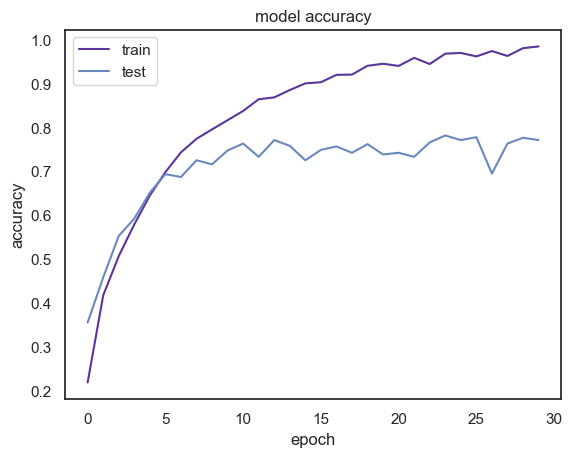

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model2.evaluate(X_test,(y_test_onehot))

30/30 [==============================] - 1s 28ms/step - loss: 1.4132 - accuracy: 0.7516


[1.4132258892059326, 0.7515789270401001]

In [41]:
# Generate predictions for the test set
predictions = model2.predict(X_test)

30/30 [==============================] - 1s 25ms/step


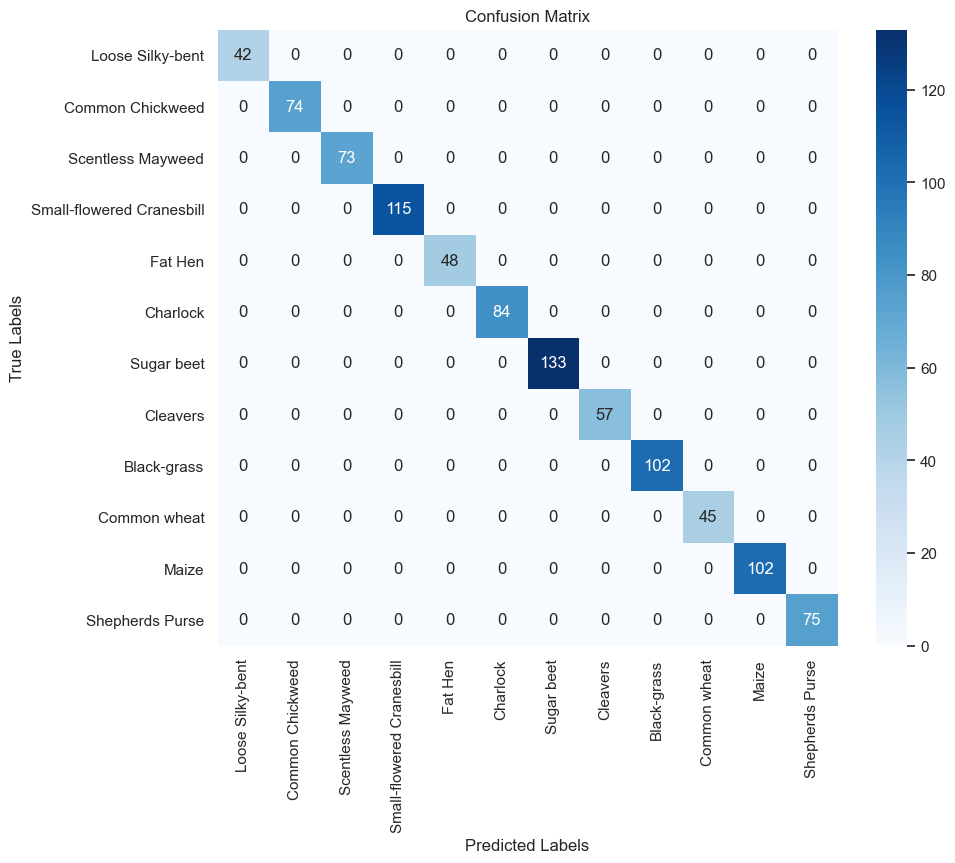

In [42]:
# Assuming 'predictions' and 'y_test_encoded' are model predictions and true labels, respectively
# Convert predictions from one-hot encoded to class indices if necessary
predicted_labels = predictions.argmax(axis=1)
true_labels = predictions.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [43]:
# If model is a Keras/TensorFlow model and your labels are one-hot encoded
predictions = model2.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report

# If y_test is one-hot encoded, convert it to class indices
true_labels = np.argmax(y_test_onehot, axis=1)

# Now print the classification report
print(classification_report(true_labels, predicted_labels, target_names=category_names))

30/30 [==============================] - 1s 25ms/step
                           precision    recall  f1-score   support

         Loose Silky-bent       0.40      0.36      0.38        47
         Common Chickweed       0.86      0.84      0.85        76
        Scentless Mayweed       0.75      0.89      0.81        62
Small-flowered Cranesbill       0.79      0.89      0.84       102
                  Fat Hen       0.52      0.66      0.58        38
                 Charlock       0.81      0.72      0.76        94
               Sugar beet       0.76      0.72      0.74       141
                 Cleavers       0.63      0.86      0.73        42
              Black-grass       0.75      0.73      0.74       105
             Common wheat       0.69      0.55      0.61        56
                    Maize       0.92      0.82      0.87       114
          Shepherds Purse       0.73      0.75      0.74        73

                 accuracy                           0.75       950
      

In [44]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = hist.index + 1

fig = px.line(
    hist, x='epoch', y=['accuracy', 'val_accuracy', 'loss', 'val_loss'],
)
fig.update_layout(
    title="Train and Validation Losses Over Epochs",
    xaxis_title="Epochs",
    yaxis_title="Accuracy/Loss",
    legend_title="Metrics",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=500,
    yaxis=dict(dtick=0.2)
)
fig.add_shape(
    type="line",
    x0=0,
    x1=max(hist["epoch"]),
    y0=1,
    y1=1,
    line=dict(
        color="gray",
        width=2,
        dash="dot",  # Dotted line
    )
)
fig.show();

##### Observations

* Initially starting with an accuracy of 21.84% and achieving perfect training accuracy (98.45%) by the 30th epoch. Despite this flawless training performance, the validation accuracy plateaued at around 76.00%, peaking at 77.11% during the 30th epoch, indicating a notable overfitting issue. The growing disparity between training and validation performance, with training loss approaching zero while validation loss continued to rise, highlights the need for improved regularization techniques or alternative approaches to enhance the model’s generalization to new data.

* The classification report for a dataset of 950 samples across 12 plant species reveals diverse performance metrics, with precision, recall, and F1-scores varying significantly among the species. High-performing species such as "Common Chickweed" and "Maize" achieved precision scores exceeding 0.86 and 0.92 respectively, demonstrating the model's strong capability to correctly identify these plants. Overall, the model achieved an accuracy of 75%, with macro and weighted averages for precision, recall, and F1-scores between 73% and 75%. This reflects a generally consistent performance, though with variability across species, highlighting areas where further improvements in classification accuracy could be made.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of translational invariance, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques:

1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

In [45]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels for both training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now convert the integer-encoded labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=12)
y_test_onehot = to_categorical(y_test_encoded, num_classes=12)

In [47]:
# Preparing data augmentation for the training set
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation between 0 and 40 degrees
    width_shift_range=0.15,  # Fraction of total width for horizontal shift
    height_shift_range=0.15, # Fraction of total height for vertical shift
    shear_range=0.15,        # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,         # Range for random zoom
    vertical_flip=True,     # Randomly flip inputs vertically
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Assuming X_train and y_train are your training images and labels
# No augmentation is applied to the validation data generator
validation_datagen = ImageDataGenerator()

# Prepare iterators
train_generator = train_datagen.flow(X_train, y_train_onehot, batch_size=32)
validation_generator = validation_datagen.flow(X_test, y_test_onehot, batch_size=32)

In [48]:
# Intializing a sequential model3
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model3.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model3.add(Dense(12, activation='softmax'))

# Compile model3
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model3
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [49]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model3.fit(
                train_generator,
                steps_per_epoch=len(X_train) / 32,  # Number of steps per epoch
                epochs=30,  # Number of epochs
                validation_data=validation_generator,
                validation_steps=len(X_test) / 32,  # Number of steps per validation epoch
                    callbacks=[es, mc])

Epoch 1/30
119/118 [==============================] - ETA: 0s - loss: 2.3129 - accuracy: 0.2103
Epoch 1: val_accuracy improved from -inf to 0.32000, saving model to best_model.h5
118/118 [==============================] - 15s 117ms/step - loss: 2.3129 - accuracy: 0.2103 - val_loss: 2.0013 - val_accuracy: 0.3200
Epoch 2/30
119/118 [==============================] - ETA: 0s - loss: 1.8634 - accuracy: 0.3392
Epoch 2: val_accuracy improved from 0.32000 to 0.41579, saving model to best_model.h5
118/118 [==============================] - 14s 120ms/step - loss: 1.8634 - accuracy: 0.3392 - val_loss: 1.6688 - val_accuracy: 0.4158
Epoch 3/30
119/118 [==============================] - ETA: 0s - loss: 1.6913 - accuracy: 0.3939
Epoch 3: val_accuracy improved from 0.41579 to 0.47263, saving model to best_model.h5
118/118 [==============================] - 14s 120ms/step - loss: 1.6913 - accuracy: 0.3939 - val_loss: 1.6040 - val_accuracy: 0.4726
Epoch 4/30
119/118 [==============================] - E

119/118 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.7705
Epoch 28: val_accuracy did not improve from 0.81263
118/118 [==============================] - 14s 114ms/step - loss: 0.6751 - accuracy: 0.7705 - val_loss: 0.6211 - val_accuracy: 0.8000
Epoch 29/30
119/118 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.7897
Epoch 29: val_accuracy improved from 0.81263 to 0.82000, saving model to best_model.h5
118/118 [==============================] - 14s 116ms/step - loss: 0.6470 - accuracy: 0.7897 - val_loss: 0.5916 - val_accuracy: 0.8200
Epoch 30/30
119/118 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.7861
Epoch 30: val_accuracy did not improve from 0.82000
118/118 [==============================] - 14s 114ms/step - loss: 0.6341 - accuracy: 0.7861 - val_loss: 0.6354 - val_accuracy: 0.8063


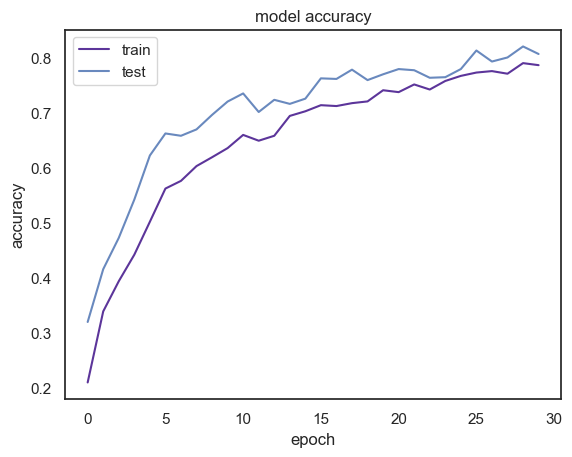

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
model3.evaluate(X_test,(y_test_onehot))

30/30 [==============================] - 1s 28ms/step - loss: 0.6354 - accuracy: 0.8063


[0.6354498863220215, 0.8063157796859741]

In [52]:
# Generate predictions for the test set
predictions = model3.predict(X_test)

30/30 [==============================] - 1s 27ms/step


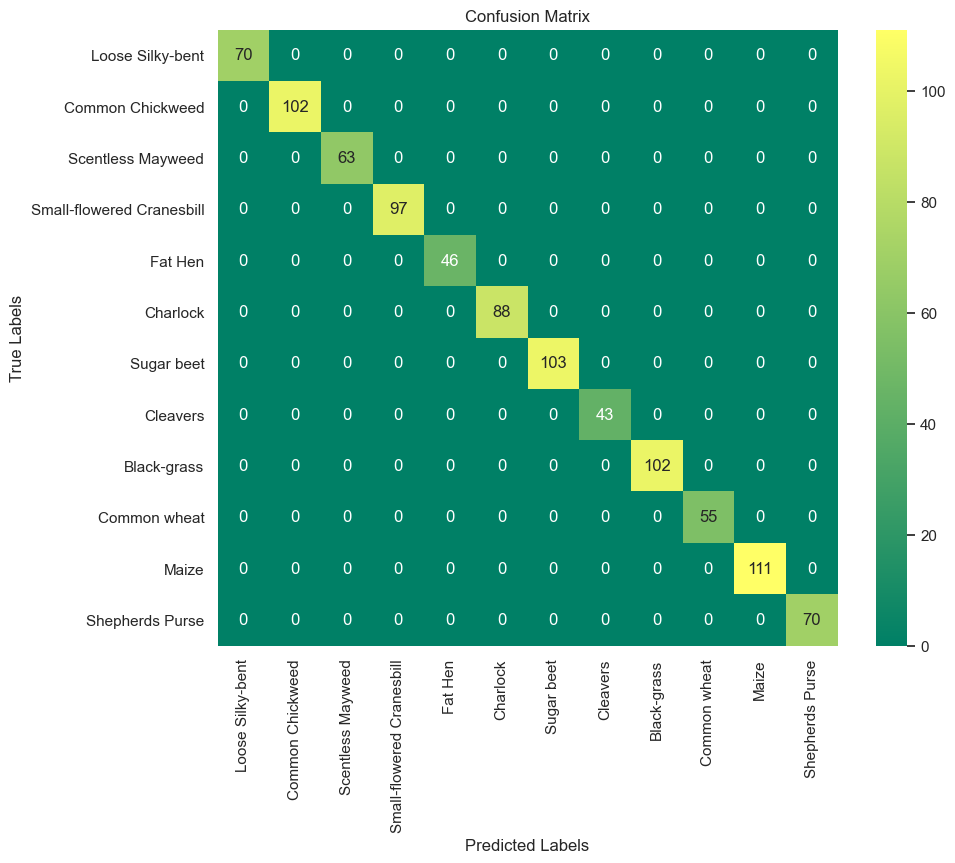

In [53]:
# Assuming 'predictions' and 'y_test_encoded' are your model predictions and true labels, respectively
# Convert predictions from one-hot encoded to class indices if necessary
predicted_labels = predictions.argmax(axis=1)
true_labels = predictions.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [54]:
# If model is a Keras/TensorFlow model and your labels are one-hot encoded
predictions = model3.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report

# If y_test is one-hot encoded, convert it to class indices
true_labels = np.argmax(y_test_onehot, axis=1)

# Now print the classification report
print(classification_report(true_labels, predicted_labels, target_names=category_names))

30/30 [==============================] - 1s 25ms/step
                           precision    recall  f1-score   support

         Loose Silky-bent       0.31      0.47      0.38        47
         Common Chickweed       0.72      0.96      0.82        76
        Scentless Mayweed       0.84      0.85      0.85        62
Small-flowered Cranesbill       0.92      0.87      0.89       102
                  Fat Hen       0.59      0.71      0.64        38
                 Charlock       0.85      0.80      0.82        94
               Sugar beet       0.86      0.63      0.73       141
                 Cleavers       0.91      0.93      0.92        42
              Black-grass       0.84      0.82      0.83       105
             Common wheat       0.80      0.79      0.79        56
                    Maize       0.96      0.94      0.95       114
          Shepherds Purse       0.89      0.85      0.87        73

                 accuracy                           0.81       950
      

In [55]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = hist.index + 1

fig = px.line(
    hist, x='epoch', y=['accuracy', 'val_accuracy', 'loss', 'val_loss'],
)
fig.update_layout(
    title="Train and Validation Losses Over Epochs",
    xaxis_title="Epochs",
    yaxis_title="Accuracy/Loss",
    legend_title="Metrics",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=500,
    yaxis=dict(dtick=0.2)
)
fig.add_shape(
    type="line",
    x0=0,
    x1=max(hist["epoch"]),
    y0=1,
    y1=1,
    line=dict(
        color="gray",
        width=2,
        dash="dot",  # Dotted line
    )
)
fig.show();


#### Observations


* The model demonstrated steady improvement throughout its 30 epochs, beginning with a loss of 2.3129 and an accuracy of 21.03%. Performance consistently increased, with validation accuracy rising from 32.00% in the first epoch to a peak of 82.00% by the 29th epoch, showcasing effective learning and generalization. Although there were some fluctuations in validation loss and accuracy, the overall trend reflects progress in reducing overfitting and improving predictive accuracy on new data, marking a significant achievement in model optimization and training efficiency.

* The classification report for a dataset of 950 samples reveals varied performance across 12 plant species, with precision, recall, and F1-scores highlighting both strengths and areas for improvement. The model performed well for species like "Common Chickweed," "Small-flowered Cranesbill," and "Maize," achieving high precision and recall scores. Conversely, "Common Wheat" and "Black-grass" exhibited lower scores, indicating areas where the model could be enhanced. Overall, the model achieved an accuracy of 81%, with macro and weighted averages for precision, recall, and F1-scores ranging between 80% and 81%, reflecting strong overall performance across the different plant species.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

#### Final Model selection
* Based on the summaries and observations from the model training reports and classification performance, the final model selection would favor the one with data augmentation that achieved an 82% accuracy. This model demonstrated high precision, recall, and F1-scores across various categories and maintained balanced performance across a diverse set of plant species. It effectively identifies the majority of species, such as "Common Chickweed," "Small-flowered Cranesbill," and "Maize," with strong precision and recall. Additionally, it performed well in more challenging categories like "Black-grass," highlighting its ability to handle diverse and difficult cases while maintaining overall effectiveness.
* The model's strengths are evident in its accurate classification of several plant species, achieving high precision and recall. This indicates a robust understanding of the distinguishing features of these species. Particularly high scores for "Maize" and "Cleavers" suggest that the model is adept at handling both broad and subtle differences between categories.
* Though we can observe the model's overall high performance, there are areas needing improvement, particularly in categories such as "Common Wheat" and "Loose Silky-bent." The precision, recall, and F1-scores for these species suggest that there is room for enhancement. Improving the model's sensitivity to the finer distinguishing features of these species could lead to better classification results.

* The model's consistent performance across a broad range of plant species suggests effective generalization. Nonetheless, ongoing validation with additional unseen data is vital to ensure that the model does not overfit and maintains its effectiveness in practical, real-world situations.


In [56]:
random_index = np.random.choice(X_test.shape[0], 1)[0]
random_image = X_test[random_index]

In [57]:
random_image_for_pred = random_image.reshape(1, random_image.shape[0], random_image.shape[1], random_image.shape[2])

In [58]:
prediction = model3.predict(random_image_for_pred)
predicted_class = np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 29ms/step


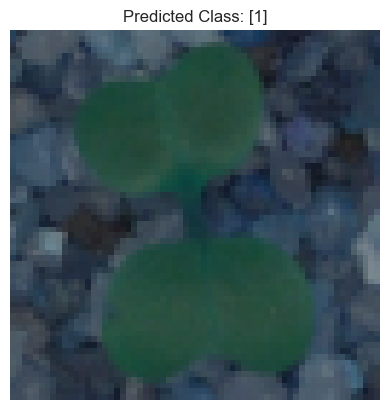

In [59]:
plt.imshow(random_image)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')  # Hide axis ticks and labels
plt.show()

### Visualizing the prediction

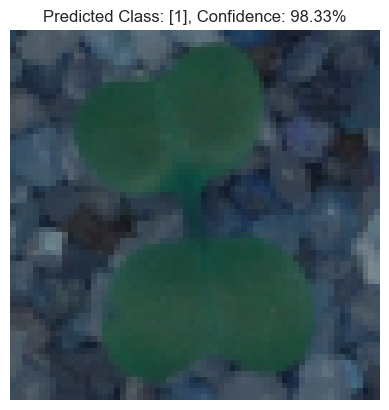

In [60]:
import matplotlib.pyplot as plt

# Assuming model outputs a softmax vector
predicted_class = np.argmax(prediction, axis=1)
confidence = np.max(prediction) * 100

plt.imshow(random_image)
plt.title(f'Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%')
plt.axis('off')
plt.show()

## Actionable Insights and Business Recommendations

* The models demonstrate varied success across different plant species, with high precision and recall for species like "Common Chickweed" and "Maize," indicating strong performance in identifying these particular plants. However, the models may struggle with other species, potentially due to class imbalance or challenges in distinguishing features. Additionally, during some training it shows signs of overfitting, where the model performs noticeably better on training data compared to validation data. This suggests a need for implementing regularization techniques or modifying the model architecture to enhance generalization and mitigate overfitting.

*  The difference in model performance across different species indicates potential inconsistencies in data quality or representation. Enhancing the dataset through techniques such as data augmentation or collecting a more diverse range of samples could improve model accuracy. The observed improvements in validation accuracy at certain epochs suggest that the model's performance could be further enhanced by employing more sophisticated data preprocessing and augmentation methods.

* Allocating additional attention and resources to species that are more challenging to classify automatically will improve in due course. The difficulty may indicate underlying complexities in their growth patterns or susceptibility to diseases. By focusing on these harder-to-classify species, we can better address their specific needs and improve overall agricultural outcomes.

* More effort is recommented in collection of more diverse and quality data, particularly for underrepresented or poorly performing classes. Explore partnerships or crowd-sourced data collection initiatives to broaden and enhance the dataset. This approach can improve the model's accuracy and generalization by providing a more comprehensive and representative sample of all classes.

* Ensuring a continuous evaluation framework to regularly assess model performance with new data. The model remains effective as new plant species are introduced or existing species undergo changes, allowing for timely updates and adjustments to maintain accuracy and relevance. This can enhance its accuracy and generalization capabilities.

* Partner with agricultural experts to interpret model predictions within the context of practical farming and research applications. This collaboration can aid in fine-tuning the model for real-world effectiveness and uncover new use cases for the technology, ensuring that it meets the specific needs and challenges of agricultural practices.

* Developing user-friendly applications for farmers using the model's capabilities into, agronomists, and researchers. By offering a tool that provides quick and reliable plant species classification, we can support decision-making in areas such as crop management, disease control, and yield optimization. This practical application helps users leverage the technology effectively to enhance their agricultural practices.



<font size=6 color='blue'>Power Ahead !!!   Save Green Planet!!!</font>